In [56]:
import pystan
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [112]:
from scipy.stats import norm, truncnorm

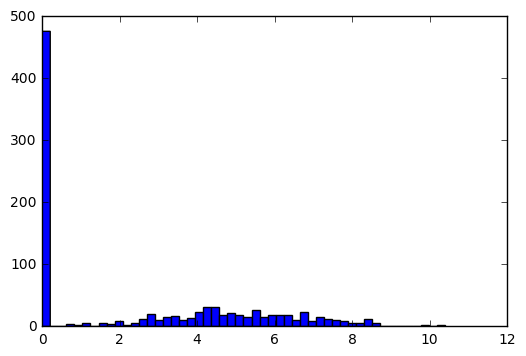

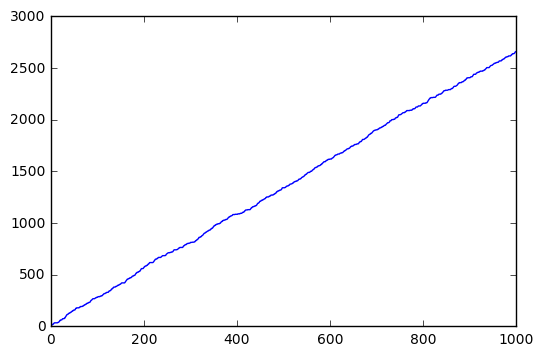

In [63]:
theta = .5
mu = 5
sigma = 2
n = 1000

improvement = rand(n)>theta

a = -mu / sigma
data = truncnorm(a, inf, loc=mu,scale=sigma).rvs(n)
data[~improvement]=0

time_series = cumsum(data)
hist(data, bins=50)
figure()
plot(time_series)

In [109]:
model_code = """
data {
    int T; // number of time periods
    vector[T] Y; // value each time period
    
    real mu_prior_location;
    real mu_prior_scale;
    
    real sigma_prior_location;
    real sigma_prior_scale;
}

parameters {
    real mu;
    real<lower = 0> sigma;
    
}

model {
    mu ~ normal(mu_prior_location, mu_prior_scale);
    sigma ~ cauchy(sigma_prior_location, sigma_prior_scale);
    
    for(t in 1:(T-1)) {
        Y[t+1] ~ normal(mu+Y[t],sigma);
    }

}
"""

model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8e66b04252e7dda9281ce8f26cd55007 NOW.


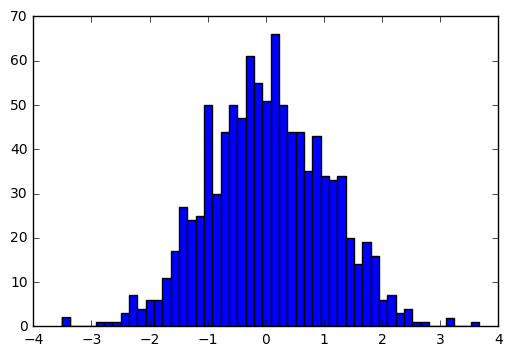

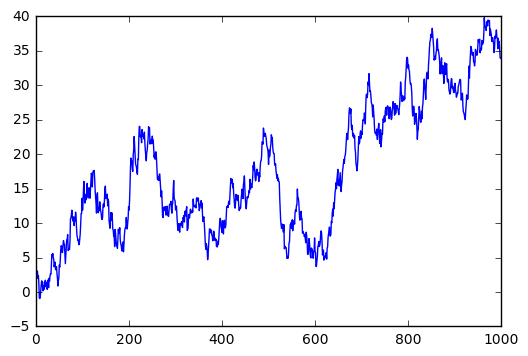

In [114]:
mu = 0
sigma = 1
n = 1000

data = norm(loc=mu,scale=sigma).rvs(n)

time_series = cumsum(data)
hist(data, bins=50)
figure()
plot(time_series)

In [119]:
stan_data = {'T': len(time_series),
       'Y': time_series,
       'mu_prior_location': 3,
       'mu_prior_scale': 1,
       'sigma_prior_location': 0,
       'sigma_prior_scale': 2}

In [126]:
fit = model.sampling(stan_data)
print(fit)

Inference for Stan model: anon_model_8e66b04252e7dda9281ce8f26cd55007.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      0.03  5.9e-4   0.03  -0.03   0.01   0.03   0.05    0.1   2848    1.0
sigma   1.01  4.6e-4   0.02   0.97    1.0   1.01   1.03   1.06   2346    1.0
lp__  -517.3    0.02   0.98 -519.9 -517.6 -516.9 -516.5 -516.3   2018    1.0

Samples were drawn using NUTS at Fri Oct 28 08:20:53 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [156]:
model_code = """
functions {
  real lower_truncated_normal_lpdf(real x, real mu, real sigma, real A) {
    real out;
    if(x<=A) {
      out = log(0.0);
    } else {
      out = -log(sigma) + normal_lpdf(x| mu, sigma) - normal_lccdf(A | mu, sigma);
    }
    return(out);
  }
}
  
data {
    int T; // number of time periods
    vector[T] Y; // value each time period
    
    real mu_prior_location;
    real mu_prior_scale;
    
    real sigma_prior_location;
    real sigma_prior_scale;
}

parameters {
    real<lower=0> mu;
    real<lower = 0> sigma;
    
}

model {
    mu ~ normal(mu_prior_location, mu_prior_scale);
    sigma ~ cauchy(sigma_prior_location, sigma_prior_scale);
    
    for(t in 1:(T-1)) {
        target += lower_truncated_normal_lpdf( Y[t+1]-Y[t] | mu, sigma, 0.0);
    }

}
"""

model = pystan.StanModel(model_code=model_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ed78da2943ed9a83717975f3fb56f30f NOW.


Inference for Stan model: anon_model_ed78da2943ed9a83717975f3fb56f30f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      7.93  8.5e-4   0.04   7.84    7.9   7.93   7.96   8.02   2562    1.0
sigma   1.39  4.4e-4   0.02   1.35   1.38   1.39   1.41   1.43   2396    1.0
lp__   -2598    0.02   0.99  -2601  -2599  -2598  -2598  -2597   2320    1.0

Samples were drawn using NUTS at Fri Oct 28 08:56:44 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


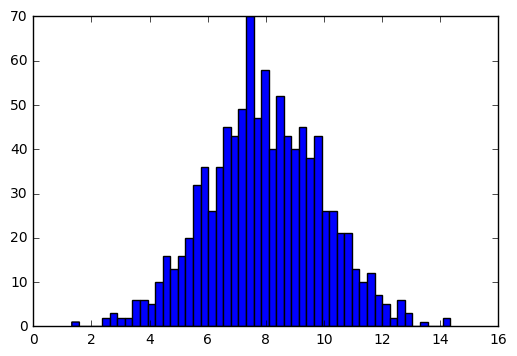

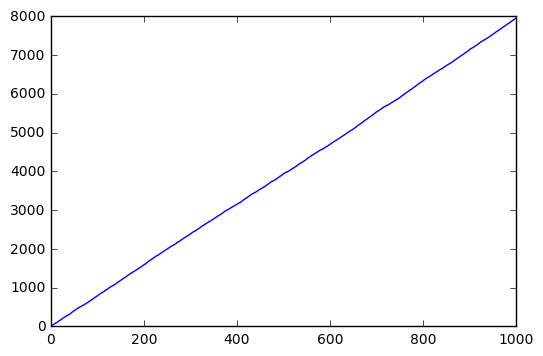

In [157]:
mu = 8
sigma = 2
n = 1000


a = -mu / sigma
data = truncnorm(a, inf, loc=mu,scale=sigma).rvs(n)

time_series = cumsum(data)
hist(data, bins=50)
figure()
plot(time_series)

stan_data = {'T': len(time_series),
       'Y': time_series,
       'mu_prior_location': 1,
       'mu_prior_scale': 1,
       'sigma_prior_location': 2,
       'sigma_prior_scale': 2}

fit = model.sampling(stan_data)
print(fit)

In [160]:
model_code = """
functions {
  real lower_truncated_normal_lpdf(real x, real mu, real sigma, real A) {
    real out;
    if(x<=A) {
      out = log(0.0);
    } else {
      out = -log(sigma) + normal_lpdf(x| mu, sigma) - normal_lccdf(A | mu, sigma);
    }
    return(out);
  }
}
  
data {
    int T; // number of time periods
    real<lower=0> Y[T]; // value each time period
    
    real mu_prior_location;
    real mu_prior_scale;
    
    real sigma_prior_location;
    real sigma_prior_scale;
}

parameters {
    real<lower=0> mu;
    real<lower = 0> sigma;
    
}

model {
    mu ~ normal(mu_prior_location, mu_prior_scale);
    sigma ~ cauchy(sigma_prior_location, sigma_prior_scale);
    
    for(t in 1:T) {
        target += lower_truncated_normal_lpdf( Y[t] | mu, sigma, 0.0);
    }

}
"""

model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a568e172aac7a7d42f1d1d151a005c5e NOW.


Inference for Stan model: anon_model_a568e172aac7a7d42f1d1d151a005c5e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      8.02  9.1e-4   0.05   7.93   7.99   8.02   8.05   8.11   2545    1.0
sigma   1.47  4.7e-4   0.02   1.43   1.46   1.47   1.49   1.52   2421    1.0
lp__   -2717    0.02   0.99  -2720  -2717  -2717  -2716  -2716   2119    1.0

Samples were drawn using NUTS at Fri Oct 28 09:01:51 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


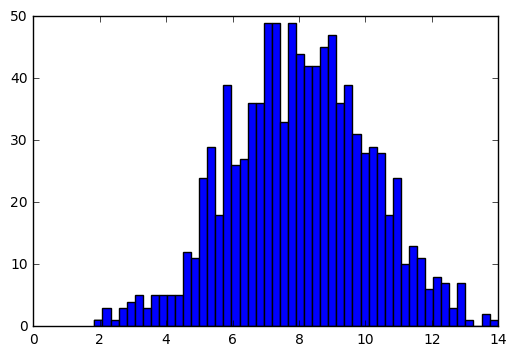

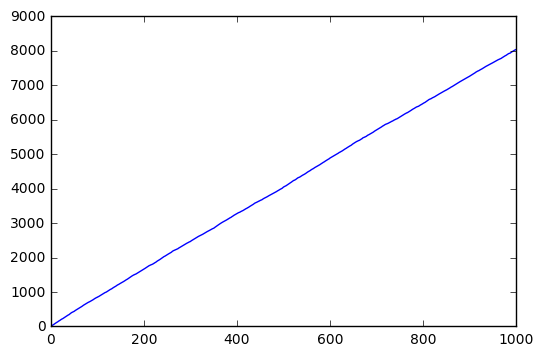

In [161]:
mu = 8
sigma = 2
n = 1000


a = -mu / sigma
data = truncnorm(a, inf, loc=mu,scale=sigma).rvs(n)

time_series = cumsum(data)
hist(data, bins=50)
figure()
plot(time_series)

stan_data = {'T': len(data),
       'Y': data,
       'mu_prior_location': 1,
       'mu_prior_scale': 1,
       'sigma_prior_location': 2,
       'sigma_prior_scale': 2}

fit = model.sampling(stan_data)
print(fit)

In [162]:
model_code = """
functions {
  real lower_truncated_normal_lpdf(real x, real mu, real sigma, real A) {
    real out;
    if(x<=A) {
      out = log(0.0);
    } else {
      out = -log(sigma) + normal_lpdf(x| mu, sigma) - normal_lccdf(A | mu, sigma);
    }
    return(out);
  }
}
  
data {
    int T; // number of time periods
    real<lower=0> Y[T]; // value each time period
    
    real mu_prior_location;
    real mu_prior_scale;
    
    real sigma_prior_location;
    real sigma_prior_scale;
}

parameters {
    real<lower=0> mu;
    real<lower = 0> sigma;
    
}

model {
    mu ~ normal(mu_prior_location, mu_prior_scale);
    sigma ~ cauchy(sigma_prior_location, sigma_prior_scale);
    
    for(t in 1:T) {
        target += normal_lpdf(Y[t]| mu, sigma);
    }

}
"""

model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_582bf1defc55fa561a48285fe570cd9a NOW.


Inference for Stan model: anon_model_582bf1defc55fa561a48285fe570cd9a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      8.02  1.3e-3   0.06    7.9   7.98   8.03   8.07   8.15   2391    1.0
sigma   1.93  8.5e-4   0.04   1.85    1.9   1.93   1.96   2.02   2495    1.0
lp__   -2097    0.02   1.03  -2099  -2097  -2096  -2096  -2096   1734    1.0

Samples were drawn using NUTS at Fri Oct 28 09:02:43 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


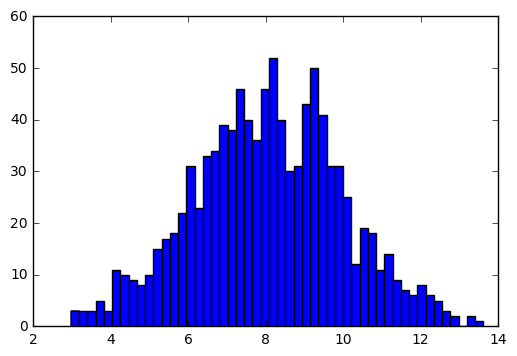

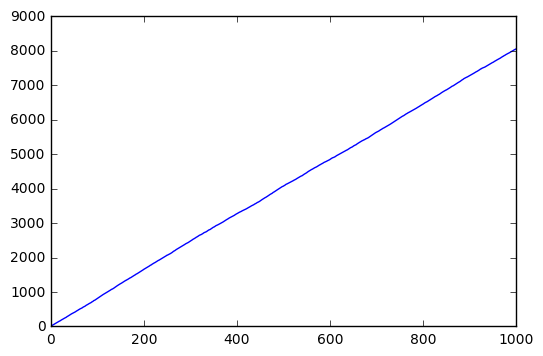

In [163]:
mu = 8
sigma = 2
n = 1000


a = -mu / sigma
data = truncnorm(a, inf, loc=mu,scale=sigma).rvs(n)

time_series = cumsum(data)
hist(data, bins=50)
figure()
plot(time_series)

stan_data = {'T': len(data),
       'Y': data,
       'mu_prior_location': 1,
       'mu_prior_scale': 1,
       'sigma_prior_location': 2,
       'sigma_prior_scale': 2}

fit = model.sampling(stan_data)
print(fit)

The problem is in our custom-made truncated normal. I suspect the problem is in the normal_lccdf, which should be a constant given a particular mu and sigma but I think Stan may be treating it otherwise. If we could calculate that directly then we may fix it?